# Coding Corona

In [16]:
import pandas as pd
#extract the data from github
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#subset last two days and location info
most_recent_cases = df.iloc[:, [0, 1, -2, -1]]
#creates a new column for total new cases
most_recent_cases['new'] = df.iloc[:, -1] - df.iloc[:, -2]
#create aggregate of most recent cases by country/region
most_recent_new_cases = most_recent_cases.groupby('Country/Region').sum().nlargest(10, '3/24/20')[['new']]
#create total_cases
largest_total_cases = most_recent_cases.groupby('Country/Region').sum().nlargest(10, '3/24/20')[['3/24/20']]

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [24]:
def get_new_cases():
    import pandas as pd
    #extract the data from github
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    #subset last two days and location info
    most_recent_cases = df.iloc[:, [0, 1, -2, -1]]
    #creates a new column for total new cases
    most_recent_cases['new'] = df.iloc[:, -1] - df.iloc[:, -2]
    #create aggregate of most recent cases by country/region
    most_recent_new_cases = most_recent_cases.groupby('Country/Region').sum().nlargest(10, 'new')[['new']]
    return most_recent_new_cases

def get_total_cases():
    import pandas as pd
    #extract the data from github
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    #subset last two days and location info
    most_recent_cases = df.iloc[:, [0, 1, -2, -1]]
    #creates a new column for total new cases
    most_recent_cases['new'] = df.iloc[:, -1] - df.iloc[:, -2]
    #create total_cases
    largest_total_cases = most_recent_cases.groupby('Country/Region').sum().nlargest(10, '3/24/20')[['3/24/20']]
    return largest_total_cases

def make_map():
    import pandas as pd
    #extract the data from github
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    m = folium.Map(location = [33, 65], tiles = 'Stamen Toner', zoom_start=2)
    for row in df.iterrows():
        lat = row[1]['Lat']
        long = row[1]['Long']
        rad = row[1]['3/24/20']
        folium.Circle(location = [lat, long], radius = rad*10,
                 color = 'red',
                 fill = True).add_to(m)
    return m

In [51]:
import pandas as pd
#extract the data from github
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
   

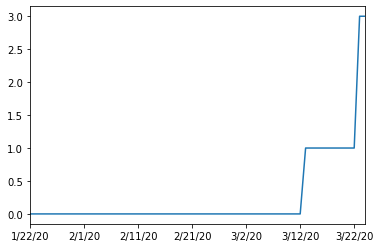

In [56]:
%matplotlib inline
df.iloc[5, 4:].plot()

In [26]:
get_total_cases()

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,3/24/20
Country/Region,
China,81591
Italy,69176
US,53740
Spain,39885
Germany,32986
Iran,24811
France,22622
Switzerland,9877
"Korea, South",9037


In [27]:
df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264


In [29]:
#!pip install folium

In [30]:
import folium

In [41]:
m = folium.Map(location = [33, 65], tiles = 'Stamen Toner')

In [42]:
folium.Circle(location = [33, 65], radius = 74*10,
             color = 'red',
             fill = True).add_to(m)

In [48]:
m = folium.Map(location = [33, 65], tiles = 'Stamen Toner', zoom_start=2)
for row in df.iterrows():
    lat = row[1]['Lat']
    long = row[1]['Long']
    rad = row[1]['3/24/20']
    folium.Circle(location = [lat, long], radius = rad*10,
             color = 'red',
             fill = True).add_to(m)

In [49]:
m

In [57]:
import statsmodels.api as sm

In [58]:
from statsmodels.tsa.arima_model import ARIMA

In [98]:
x = df.loc[df['Country/Region'] == 'US'].groupby('Country/Region').sum()

In [99]:
x

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,37.0902,-95.7129,1,1,2,2,5,5,5,5,...,3499,4632,6421,7783,13677,19100,25489,33276,43847,53740


In [111]:
#x = x.iloc[:, 40:].astype('float')
x = df.loc[df['Country/Region'] == 'US'].groupby('Country/Region').sum()
x = x.iloc[:, 30:].T
#t_df = pd.DataFrame({'vals': x})
arima = ARIMA(x['US'].diff().dropna(), (1, 2, 1))

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [112]:
model = arima.fit()

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D2.US   No. Observations:                   32
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -261.760
Method:                       css-mle   S.D. of innovations            837.467
Date:                Tue, 24 Mar 2020   AIC                            531.520
Time:                        22:42:57   BIC                            537.383
Sample:                    02-22-2020   HQIC                           533.463
                         - 03-24-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          42.7637     23.919      1.788      0.084      -4.116      89.643
ar.L1.D2.US    -0.5138      0.184     -2.787      0.009      -0.875      -0.153
ma.L1.D2.US    -0.7894      0.139     -5.680      0.000      -1.062      -0.517
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9462           +0.0000j            1.9462            0.5000
MA.1            1.2669           +0.0000j            1.2669            0.0000
-----------------------------------------------------------------------------
"""

In [114]:
model.forecast(3)[0]

array([12102.01639055, 12892.34052471, 14476.36496416])

In [72]:
t_df = pd.DataFrame({'vals': x})

In [73]:
t_df

,vals
1/22/20,0.0
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
...,...
3/20/20,3.0
3/21/20,3.0
3/22/20,5.0
3/23/20,5.0


In [ ]:
ARIMA()